# ML Prague - Word Embeddings 2 : FastText & Application
Continuation of [Word2Vec notebook](https://github.com/RaRe-Technologies/talks/blob/master/2018-03-23_MLPrague-workshop/PragueML-Word2Vec.ipynb).

Objectives of this notebook:

- Demonstrate training/utilization of a `FastText` model using Gensim.
- Application of `FastText` word embeddings on a supervised text classification task.

### Requirements:
- Python3.5
- gensim
- pandas
- matplotlib
- sklearn

In [1]:
# imports

from __future__ import print_function
import logging
import gensim
from gensim.models import FastText, KeyedVectors
from gensim.models.word2vec import Text8Corpus
from gensim.parsing import preprocess_string
from gensim.parsing.preprocessing import strip_punctuation, strip_numeric, strip_multiple_whitespaces, strip_short
import gensim.downloader as api
import numpy as np
from collections import defaultdict
import multiprocessing
from smart_open import smart_open

In [2]:
# ensure FAST_VERSION > -1 - would be painfully slow to train models otherwise.
# A good BLAS library is recommended to make use of heavy low level optimisations.
gensim.models.fasttext.FAST_VERSION

1

In [3]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## Training a `FastText` model
Train a `FastText` model on `text8`.

In [4]:
# a memory-friendly iterator
# text8_corpus = Text8Corpus('./data/text8')
text8_corpus = api.load("text8")

In [5]:
%%time
# train a `FasText` model on text8 corpus
model_text8 = FastText(text8_corpus, size=50, iter=5, workers=multiprocessing.cpu_count())

2018-03-16 22:37:27,818 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-03-16 22:37:27,821 : INFO : collecting all words and their counts
2018-03-16 22:37:27,829 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-16 22:37:32,589 : INFO : collected 253854 word types from a corpus of 17005207 raw words and 1701 sentences
2018-03-16 22:37:32,589 : INFO : Loading a fresh vocabulary
2018-03-16 22:37:32,850 : INFO : min_count=5 retains 71290 unique words (28% of original 253854, drops 182564)
2018-03-16 22:37:32,851 : INFO : min_count=5 leaves 16718844 word corpus (98% of original 17005207, drops 286363)
2018-03-16 22:37:33,021 : INFO : deleting the raw counts dictionary of 253854 items
2018-03-16 22:37:33,038 : INFO : sample=0.001 downsamples 38 most-common words
2018-03-16 22:37:33,039 : INFO : downsampling leaves estimated 12506280 word corpus (74.8% of prior 16718844)
2018-03-16 22:37:38,524 : INFO : estimated requir

2018-03-16 22:38:37,241 : INFO : EPOCH 2 - PROGRESS: at 7.64% examples, 233046 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:38,257 : INFO : EPOCH 2 - PROGRESS: at 9.52% examples, 232498 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:39,276 : INFO : EPOCH 2 - PROGRESS: at 11.58% examples, 235324 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:40,295 : INFO : EPOCH 2 - PROGRESS: at 13.58% examples, 236904 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:41,301 : INFO : EPOCH 2 - PROGRESS: at 15.29% examples, 233610 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:42,349 : INFO : EPOCH 2 - PROGRESS: at 17.23% examples, 233463 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:43,352 : INFO : EPOCH 2 - PROGRESS: at 19.28% examples, 235729 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:44,365 : INFO : EPOCH 2 - PROGRESS: at 21.34% examples, 237439 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:38:45,372 : INFO : EPOCH 2 - PROGRESS: at 23.28% examples, 237955 words/s, in_qsize 

2018-03-16 22:39:44,060 : INFO : EPOCH 3 - PROGRESS: at 37.86% examples, 243942 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:45,087 : INFO : EPOCH 3 - PROGRESS: at 39.92% examples, 244280 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:46,099 : INFO : EPOCH 3 - PROGRESS: at 41.86% examples, 244098 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:47,124 : INFO : EPOCH 3 - PROGRESS: at 43.74% examples, 243461 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:48,142 : INFO : EPOCH 3 - PROGRESS: at 45.56% examples, 242681 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:49,151 : INFO : EPOCH 3 - PROGRESS: at 47.44% examples, 242337 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:50,215 : INFO : EPOCH 3 - PROGRESS: at 49.21% examples, 240941 words/s, in_qsize 0, out_qsize 1
2018-03-16 22:39:51,225 : INFO : EPOCH 3 - PROGRESS: at 51.09% examples, 240637 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:39:52,230 : INFO : EPOCH 3 - PROGRESS: at 53.09% examples, 240996 words/s, in_qsiz

2018-03-16 22:40:50,926 : INFO : EPOCH 4 - PROGRESS: at 64.20% examples, 239212 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:51,932 : INFO : EPOCH 4 - PROGRESS: at 66.37% examples, 240101 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:52,974 : INFO : EPOCH 4 - PROGRESS: at 68.49% examples, 240550 words/s, in_qsize 0, out_qsize 1
2018-03-16 22:40:53,989 : INFO : EPOCH 4 - PROGRESS: at 70.61% examples, 241138 words/s, in_qsize 0, out_qsize 1
2018-03-16 22:40:55,009 : INFO : EPOCH 4 - PROGRESS: at 72.60% examples, 241265 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:56,025 : INFO : EPOCH 4 - PROGRESS: at 74.72% examples, 241800 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:57,049 : INFO : EPOCH 4 - PROGRESS: at 76.84% examples, 241883 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:58,072 : INFO : EPOCH 4 - PROGRESS: at 78.84% examples, 241869 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:40:59,101 : INFO : EPOCH 4 - PROGRESS: at 80.83% examples, 241873 words/s, in_qsiz

2018-03-16 22:41:57,554 : INFO : EPOCH 5 - PROGRESS: at 90.89% examples, 236264 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:41:58,576 : INFO : EPOCH 5 - PROGRESS: at 92.95% examples, 236533 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:41:59,599 : INFO : EPOCH 5 - PROGRESS: at 94.89% examples, 236515 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:42:00,600 : INFO : EPOCH 5 - PROGRESS: at 96.94% examples, 236906 words/s, in_qsize 0, out_qsize 0
2018-03-16 22:42:01,663 : INFO : EPOCH 5 - PROGRESS: at 98.82% examples, 236538 words/s, in_qsize 0, out_qsize 1
2018-03-16 22:42:02,205 : INFO : worker thread finished; awaiting finish of 7 more threads
2018-03-16 22:42:02,206 : INFO : worker thread finished; awaiting finish of 6 more threads
2018-03-16 22:42:02,207 : INFO : worker thread finished; awaiting finish of 5 more threads
2018-03-16 22:42:02,207 : INFO : worker thread finished; awaiting finish of 4 more threads
2018-03-16 22:42:02,208 : INFO : worker thread finished; awaiting finis

CPU times: user 12min 49s, sys: 2.2 s, total: 12min 52s
Wall time: 4min 37s


In [6]:
print('Vocabulary size: %d' % len(model_text8.wv.vocab))
print('Number of character ngram vectors: %d' % model_text8.wv.num_ngram_vectors)
print('Word embeddings matrix (enriched with sub-word information) shape: %s' % str(model_text8.wv.vectors.shape))
print('Word embeddings matrix shape: %s' % str(model_text8.wv.vectors_vocab.shape))
print('Character ngrams embeddings matrix shape: %s' % str(model_text8.wv.vectors_ngrams.shape))

Vocabulary size: 71290
Number of character ngram vectors: 306868
Word embeddings matrix (enriched with sub-word information) shape: (71290, 50)
Word embeddings matrix shape: (71290, 50)
Character ngrams embeddings matrix shape: (306868, 50)


In [7]:
# get an in-vocab word's vector
print(model_text8.wv['cat'].shape)
print(model_text8.wv['cat'])
print(model_text8.wv.word_vec('cat', use_norm=False))

(50,)
[-0.45819575  5.5885515   3.6387331  -3.3519166  -1.3491356  -0.26799038
 -1.7153485  -0.77152413 -2.057514   -1.6463739   0.5929006   2.0102293
  0.35175705 -2.4528325   5.561379    2.4404454   0.453492    2.3228037
 -3.475931   -1.4994929   3.940188   -4.0734563  -0.7827139  -1.8895215
  0.38036972 -2.2531722   1.1310539   3.4459815   2.7096388  -1.214768
  6.256368    2.71237    -0.92691433 -2.6782024   2.5726168   2.1241095
 -0.04021253  2.513042   -2.4969246  -2.256464   -2.042563   -0.29919767
 -0.09588774  3.452844    2.0974185  -1.8114233  -0.788692   -1.9928592
 -1.2659899  -0.99849504]
[-0.45819575  5.5885515   3.6387331  -3.3519166  -1.3491356  -0.26799038
 -1.7153485  -0.77152413 -2.057514   -1.6463739   0.5929006   2.0102293
  0.35175705 -2.4528325   5.561379    2.4404454   0.453492    2.3228037
 -3.475931   -1.4994929   3.940188   -4.0734563  -0.7827139  -1.8895215
  0.38036972 -2.2531722   1.1310539   3.4459815   2.7096388  -1.214768
  6.256368    2.71237    -0.926

In [8]:
# get vector for an out-of-vocabulary word
model_text8.wv['catdog']

array([ 0.7291348 ,  3.5356193 ,  1.7518605 , -2.9246378 , -0.40738115,
        0.27420315, -0.8440845 , -1.1732155 , -0.17970103, -0.5608066 ,
        0.5388903 ,  0.2755141 ,  0.30588463, -1.0315245 ,  3.615388  ,
        1.2090447 ,  0.65171933,  1.0481347 , -2.4673462 , -0.01653223,
        2.2225122 , -2.4749672 , -0.55831814, -0.9899566 , -0.02005004,
       -1.335601  ,  1.1808366 ,  1.9432597 ,  1.1437207 , -0.80937105,
        3.404318  ,  2.0563555 ,  0.2363719 , -1.1152228 ,  2.3207738 ,
        1.3688016 , -0.08992601,  1.518004  , -2.1027546 , -0.7068008 ,
       -1.7800468 , -1.7185248 ,  0.9618279 ,  1.5343028 ,  1.3573704 ,
       -0.26615846, -1.0803212 , -1.1425296 , -1.8604358 , -1.6131473 ],
      dtype=float32)

In [9]:
model_text8.wv.most_similar('catdog')

2018-03-16 22:42:05,504 : INFO : precomputing L2-norms of word weight vectors
2018-03-16 22:42:05,525 : INFO : precomputing L2-norms of ngram weight vectors


[('grub', 0.7429043650627136),
 ('hotdog', 0.740623950958252),
 ('og', 0.7290818095207214),
 ('cat', 0.7260093688964844),
 ('vegeta', 0.718673586845398),
 ('shrub', 0.7120037078857422),
 ('carnivora', 0.7106377482414246),
 ('skoda', 0.708187460899353),
 ('garb', 0.7072864770889282),
 ('cuyo', 0.707156777381897)]

In [10]:
# find the top-n most similar words
# Compare the differences with `Word2Vec` model
# [(u'winter', 0.8970272541046143),
#  (u'spring', 0.8612320423126221),
#  (u'autumn', 0.8402277827262878),
#  (u'olympics', 0.7919313907623291),
#  (u'nights', 0.7284520268440247)]
model_text8.wv.most_similar('summer')

[('midsummer', 0.9483070373535156),
 ('winter', 0.8741732239723206),
 ('summertime', 0.8664563298225403),
 ('summerson', 0.8463586568832397),
 ('midwinter', 0.8360216021537781),
 ('winterthur', 0.8331443071365356),
 ('winterson', 0.8170243501663208),
 ('kummer', 0.8122742772102356),
 ('wintertime', 0.8121621012687683),
 ('fimbulwinter', 0.8051884770393372)]

**Online training** (on new corpus), **Saving/Loading** and other APIs are exactly the same as those for `Word2Vec` (Look at notebook for [part 1](https://github.com/RaRe-Technologies/talks/blob/master/2018-03-23_MLPrague-workshop/PragueML-Word2Vec.ipynb)).

## Comparison with `Word2Vec` embeddings
Due to lack of time, it is not possible to train/run the comparisons between `Word2Vec` and `FastText` word embeddings. Let us look at a blog which neatly summarizes the differences between the `Word2Vec` and `FastText` embeddings.

Link --
https://rare-technologies.com/fasttext-and-gensim-word-embeddings/

## Task - Movie Genre prediction
Look at [notebook for previous part](https://github.com/RaRe-Technologies/talks/blob/master/2018-03-23_MLPrague-workshop/PragueML-Word2Vec.ipynb) description of task and dataset details.

In [11]:
import operator
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

/home/ivan/.virtualenvs/p3-check/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [12]:
df = pd.read_csv('data/tagged_plots_movielens.csv')
df = df.dropna()
total_words = df['plot'].apply(lambda x: len(x.split(' '))).sum()
print('Total number of words in the dataset: %d' % total_words)

Total number of words in the dataset: 171156


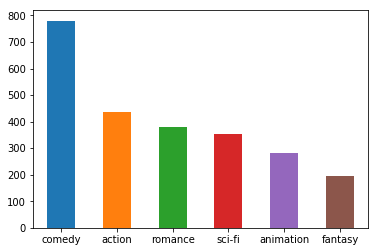

In [13]:
df.tag.value_counts().plot(kind="bar", rot=0)
my_tags = ['sci-fi' , 'action', 'comedy', 'fantasy', 'animation', 'romance']

In [14]:
float(df.tag.value_counts()['comedy']) / df.tag.value_counts().sum() 

0.32138442521631644

In [15]:
train_data, test_data = train_test_split(df, test_size=0.1, random_state=42)

In [16]:
print('Number of training examples: %d' % len(train_data))
print('Number of tesing examples: %d' % len(test_data))

Number of training examples: 2184
Number of tesing examples: 243


### Model Evaluation

In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(my_tags))
    target_names = my_tags
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
def evaluate_prediction(predictions, target, title="Confusion matrix"):
    print('accuracy %s' % accuracy_score(target, predictions))
    cm = confusion_matrix(target, predictions)
    print('confusion matrix\n %s' % cm)
    print('(row=expected, col=predicted)')
    
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plot_confusion_matrix(cm_normalized, title + ' Normalized')

### Tokenize text

In [19]:
def custom_tokenize_text(text):
    filters = [strip_punctuation, strip_numeric, strip_multiple_whitespaces, strip_short]
    cleaned_words = [word for word in preprocess_string(text, filters=filters)]
    if cleaned_words:
        return cleaned_words

### Prepare data

In [20]:
# prepare training data
X_train = []
y_train = []
for plot, tag in train_data[['plot', 'tag']].values:
    X_train.append(custom_tokenize_text(plot))
    y_train.append(tag)
X_train, y_train = np.array(X_train), np.array(y_train)
print(len(X_train), len(y_train))
print(y_train[0])
print(X_train[0])

2184 2184
comedy
['Turkish', 'and', 'his', 'close', 'friend', 'accomplice', 'Tommy', 'get', 'pulled', 'into', 'the', 'world', 'match', 'fixing', 'the', 'notorious', 'Brick', 'Top', 'Things', 'get', 'complicated', 'when', 'the', 'boxer', 'they', 'had', 'lined', 'gets', 'badly', 'beaten', 'Pitt', 'pikey', 'slang', 'for', 'Irish', 'Gypsy', 'who', 'comes', 'into', 'the', 'equation', 'after', 'Turkish', 'unlicensed', 'boxing', 'promoter', 'wants', 'buy', 'caravan', 'off', 'the', 'Irish', 'Gypsies', 'They', 'then', 'try', 'convince', 'Pitt', 'not', 'only', 'fight', 'for', 'them', 'but', 'lose', 'for', 'them', 'too', 'Whilst', 'all', 'this', 'going', 'huge', 'diamond', 'heist', 'takes', 'place', 'and', 'fistful', 'motley', 'characters', 'enter', 'the', 'story', 'including', 'Cousin', 'Avi', 'Boris', 'The', 'Blade', 'Franky', 'Four', 'Fingers', 'and', 'Bullet', 'Tooth', 'Tony', 'Things', 'from', 'bad', 'worse', 'all', 'becomes', 'about', 'the', 'money', 'the', 'guns', 'and', 'the', 'damned', '

In [21]:
# prepare test data
X_test = []
y_test = []
for plot, tag in test_data[['plot', 'tag']].values:
    X_test.append(custom_tokenize_text(plot))
    y_test.append(tag)
X_test, y_test = np.array(X_test), np.array(y_test)
print(len(X_test), len(y_test))

243 243


## Technique 1: Bag-of-CharNGrams + Linear SVM

### CountVectorizer - character ngram features

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
text = ["The quick brown fox jumped over the lazy dog."]
# create the transform
vectorizer = CountVectorizer(analyzer="char", ngram_range=([3,6]), max_features=20)
# tokenize and build vocab
vectorizer.fit(text)
# summarize
print(sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1)))
# encode document
vector = vectorizer.transform(text)
# summarize encoded vector
print(vector.shape)
print(type(vector))
print(vector.toarray())

[(' br', 0), ('he ', 1), ('over ', 2), ('over t', 3), ('own', 4), ('own ', 5), ('own f', 6), ('own fo', 7), ('ox ', 8), ('ox j', 9), ('ox ju', 10), ('ox jum', 11), ('ped', 12), ('ped ', 13), ('ped o', 14), ('ped ov', 15), ('qui', 16), ('quic', 17), ('the', 18), ('the ', 19)]
(1, 20)
<class 'scipy.sparse.csr.csr_matrix'>
[[1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2]]


In [23]:
ngrams_counts_svc = Pipeline([("count_ngrams_vectorizer", CountVectorizer(analyzer="char", ngram_range=([3,6]), max_features=10000)), ("linear_svc", LinearSVC())])

In [24]:
# CountVectorizer expects a list of strings and not a list of list of tokens.
X_train_ngrams = [' '.join(tokens) for tokens in X_train]
X_test_ngrams = [' '.join(tokens) for tokens in X_test]

In [25]:
%%time
# fit the classifier
ngrams_counts_svc.fit(X_train_ngrams, y_train)

CPU times: user 4.83 s, sys: 64.1 ms, total: 4.89 s
Wall time: 4.89 s


Pipeline(memory=None,
     steps=[('count_ngrams_vectorizer', CountVectorizer(analyzer='char', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=10000, min_df=1,
        ngram_range=[3, 6], preprocessor=None, stop_words...ax_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [26]:
# get predictions on test data
y_pred_ngrams_counts_svc = ngrams_counts_svc.predict(X_test_ngrams)

accuracy 0.4156378600823045
confusion matrix
 [[16  4 11  2  6  3]
 [ 9  4 11  5  1  1]
 [10  7 49  3 15  2]
 [ 2  4  3  2  2  3]
 [ 4  0 17  0 14  0]
 [ 6  3  4  3  1 16]]
(row=expected, col=predicted)


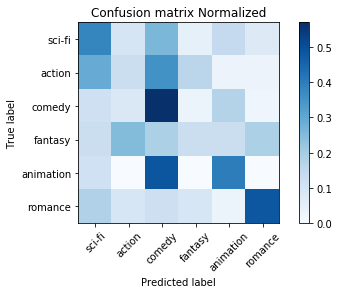

In [27]:
# plot results from test data evaluation
evaluate_prediction(y_pred_ngrams_counts_svc, y_test)

Load pre-trained FastText vectors. We will be using 'wiki-news-300d-1M-subword.vec': 1 million word vectors trained with subword infomation on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens). Can be downloaded from this link - https://fasttext.cc/docs/en/english-vectors.html.

Warning: loading can take upto 3-4 mins.

In [28]:
path = api.load("fasttext-wiki-news-subwords-300", return_path=True)

In [29]:
%%time
model_pretrained_ft = KeyedVectors.load_word2vec_format(path, limit=500000)

2018-03-16 22:42:12,432 : INFO : loading projection weights from /home/ivan/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz
2018-03-16 22:44:15,963 : INFO : loaded (500000, 300) matrix from /home/ivan/gensim-data/fasttext-wiki-news-subwords-300/fasttext-wiki-news-subwords-300.gz


CPU times: user 2min 2s, sys: 1.03 s, total: 2min 3s
Wall time: 2min 3s


The code below has been lazily copy-pasted from [previous part's notebook](https://github.com/RaRe-Technologies/talks/blob/master/2018-03-23_MLPrague-workshop/PragueML-Word2Vec.ipynb) and only changes the word embeddings model passed to the vectorizers.

## Technique 2: Average word embeddings (FastText) + Linear SVM

In [30]:
class MeanEmbeddingVectorizer(object):
    def __init__(self, word2vec):
        self.word2vec = word2vec
        self.dim = word2vec.vector_size
    
    def fit(self, X, y):
        return self 

    def transform(self, X):
        return np.array([
            np.mean([self.word2vec[w] for w in words if w in self.word2vec] 
                    or [np.zeros(self.dim)], axis=0)
            for words in X
        ])

In [31]:
avg_ft_svc = Pipeline([("mean_embedding_vectorizer", MeanEmbeddingVectorizer(model_pretrained_ft)), ("linear_svc", LinearSVC())])

In [32]:
avg_ft_svc.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('mean_embedding_vectorizer', <__main__.MeanEmbeddingVectorizer object at 0x7f03a65b7dd8>), ('linear_svc', LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))])

In [33]:
y_pred_avg_ft_svc = avg_ft_svc.predict(X_test)

accuracy 0.5761316872427984
confusion matrix
 [[30  0 10  0  0  2]
 [ 2  6 14  2  3  4]
 [ 4  1 72  0  8  1]
 [ 3  0  8  3  1  1]
 [ 0  2 21  0  9  3]
 [ 5  1  7  0  0 20]]
(row=expected, col=predicted)


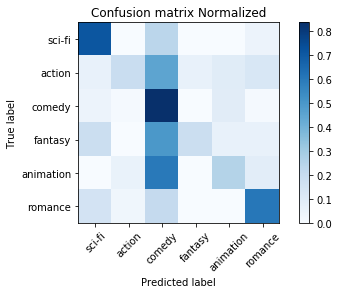

In [34]:
evaluate_prediction(y_pred_avg_ft_svc, y_test)

We saw a few techniques to get started with text classification using different word embeddings. The goal of this tutorial was to show the APIs so you can start using word embeddings and related techniques on your own data/task. The [previous notebook](https://github.com/RaRe-Technologies/talks/blob/master/2018-03-23_MLPrague-workshop/PragueML-Word2Vec.ipynb) also provided a few links to papers discussing various modifications to average word embeddings to tap into their true potential for NLP tasks.

## References
A lot of the code used in this notebook as been picked up directly/modified from various other tutorials/blogs/notebooks. Thanks to all of you guys to help speed up the creation of this notebook.
- https://github.com/RaRe-Technologies/movie-plots-by-genre/blob/master/Document%20classification%20with%20word%20embeddings%20tutorial.ipynb - Lev Konstantinovskiy.
- http://sujitpal.blogspot.in/2016/04/predicting-movie-tags-from-plots-using.html - Sujit Pal.
- http://nadbordrozd.github.io/blog/2016/05/20/text-classification-with-word2vec/ - Nadbor Drozd.
- https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/ - Jason Brownlee.